In [4]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display

SMALL_SIZE = 8
MEDIUM_SIZE = 15
BIGGER_SIZE = 20
plt.rc('text', usetex=True)
plt.rc('font', size=MEDIUM_SIZE) # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE, labelsize=MEDIUM_SIZE, linewidth=2) # fontsize of the axes title
plt.rc('xtick', labelsize=MEDIUM_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{sfmath} \boldmath \usepackage{bm} \usepackage{amsmath}'

In [ ]:
def create_all_dfs(ap_curve_linspace, df_class_flip, df_ap_curve, df_max_prob,
                   df_reg_error, result_dir):
    
    if os.path.exists(os.path.join(result_dir, 'report.xlsx')):
        os.remove(os.path.join(result_dir, 'report.xlsx'))
    excel_writer = pd.ExcelWriter(os.path.join(result_dir, "report.xlsx"),
                                  engine="xlsxwriter")
    class_flip.to_excel(excel_writer, sheet_name="class_flip")
    ap_curve.to_excel(excel_writer, sheet_name="ap_curve")
    max_prob.to_excel(excel_writer, sheet_name="max_prob_curve")
    reg_error.to_excel(excel_writer, sheet_name="reg_error_curve")
    excel_writer.save()

In [29]:
director = '/media/deepan/externaldrive1/project_repos/DEXT_versions/dext/'
file_names = ['class_flip', 'max_prob', 'reg_error', 'ap_curve']
ap_curve_linspace = 5
all_file = []
for i in file_names:
    file = os.path.join(director, i)
    data = [json.loads(line) for line in open(file, 'r')]
    all_file.append(data)
df_class_flip = all_file[0]
df_max_prob = all_file[1]
df_reg_error = all_file[2]
df_ap_curve = all_file[3]
df_class_flip_columns = ["image_index", "object_index", "explaining",
                             "detection", "score", "class", "saliency_iou", "saliency_centroid",
                             "saliency_variance", "pixels_flipped"]
df_ap_curve_columns = ["image_index", "object_index", "explaining"]
ap_50percent_columns = ["ap_50percent_" + str(round(n, 2))
                        for n in np.linspace(0, 1, ap_curve_linspace)]
df_max_prob_columns = ["image_index", "object_index", "pixels_flipped",
                       "explaining"]
max_prob_percent = ["max_prob_" + str(round(n, 2))
                    for n in np.linspace(0, 1, ap_curve_linspace)]
df_reg_error_columns = ["image_index", "object_index", "pixels_flipped",
                        "explaining"]
reg_error_percent = ["reg_error_" + str(round(n, 2))
                     for n in np.linspace(0, 1, ap_curve_linspace)]
df_ap_curve_columns = df_ap_curve_columns + ap_50percent_columns
df_max_prob_columns = df_max_prob_columns + max_prob_percent
df_reg_error_columns = df_reg_error_columns + reg_error_percent
class_flip = pd.DataFrame(df_class_flip, columns=df_class_flip_columns)
ap_curve = pd.DataFrame(df_ap_curve, columns=df_ap_curve_columns)
max_prob = pd.DataFrame(df_max_prob, columns=df_max_prob_columns)
reg_error = pd.DataFrame(df_reg_error, columns=df_reg_error_columns)

,image_index,object_index,explaining,detection,score,class,saliency_iou,saliency_centroid,saliency_variance,pixels_flipped
0,397133,3,ClassificationNone,"[0, 227, 337, 419]",0.531453,dining table,0.107969,"[144, 427]",0.026455,0.25
1,397133,3,ClassificationNone_random,"[0, 227, 337, 419]",0.531453,dining table,0.399198,"[255, 254]",0.240029,0.50
2,397133,3,combined,"[0, 227, 337, 419]",0.531453,dining table,0.107969,"[144, 427]",0.026455,0.25
3,397133,3,random,"[0, 227, 337, 419]",0.531453,dining table,0.402742,"[255, 256]",0.240033,0.50
4,397133,3,ClassificationNone,"[0, 227, 337, 419]",0.531453,dining table,0.112105,"[125, 428]",0.031163,0.50
5,397133,3,ClassificationNone_random,"[0, 227, 337, 419]",0.531453,dining table,0.395703,"[255, 255]",0.240112,0.50
6,397133,3,combined,"[0, 227, 337, 419]",0.531453,dining table,0.112105,"[125, 428]",0.031163,0.50
7,397133,3,random,"[0, 227, 337, 419]",0.531453,dining table,0.402549,"[255, 255]",0.239974,0.50
8,397133,3,ClassificationNone,"[0, 227, 337, 419]",0.531453,dining table,0.100641,"[134, 375]",0.025021,0.50
9,397133,3,ClassificationNone_random,"[0, 227, 337, 419]",0.531453,dining table,0.400241,"[255, 255]",0.239924,0.50


In [19]:
# import plotly.express as px
# Just an example plotly plot.
# def compute_and_plot_plotly(ap_files):
#     df = pd.DataFrame(columns=['Net AP @[IoU=0.5]', 'Fraction of pixels flipped', 'Merge strategy'])
#     for key, val in ap_files.items():
#         mean_ap_curve, range_values = calculate_mean_range(val)
#         data = {'Net AP @[IoU=0.5]': mean_ap_curve,
#                 'Fraction of pixels flipped': range_values, 
#                 'Merge strategy': [key, ] * len(range_values)}
#         new_df = pd.DataFrame(data)
#         df = df.append(new_df)
#     fig = px.line(df, x='Fraction of pixels flipped', y='Net AP @[IoU=0.5]', color='Merge strategy')
#     fig.update_layout(margin=dict(l=20, r=20, t=20, b=20),
#                       paper_bgcolor="LightSteelBlue")
#     fig.show()

In [20]:
def calculate_mean_range(curve_df, regex):
    curve_df.loc["mean"] = curve_df.iloc[:, 3:].mean(axis=0)
    columns = curve_df.columns.to_numpy()
    percent50 = (curve_df.filter(regex=regex))
    mean_curve = percent50.iloc[-1, :].to_numpy()
    range_values = [float(val.split(regex)[1])
                    for val in percent50.columns]
    return mean_curve, range_values

In [4]:
def plot_curve(mean_curve, range_values, key, ax):
    ax.plot(range_values, mean_curve, label=key)

In [20]:
def get_curve_labels(curve_type):
    xlabel, ylabel, title = '', '', ''
    if curve_type == 'AP_Curves':
        xlabel = r'\textbf{Fraction of pixels flipped}'
        ylabel = r'\textbf{AP$_{explain}$ @[IOU=0.50]}'
        title = r'\textbf{Net AP Curves}'
    elif curve_type == 'Max_Probability_Curves':
        xlabel = r'\textbf{Fraction of pixels flipped}'
        ylabel = r'\textbf{Class$_{explain}$}'
        title = r'\textbf{Max Probability Curves}'
    elif curve_type == 'Regression_Error_Curves':
        xlabel = r'\textbf{Fraction of pixels flipped}'
        ylabel = r'\textbf{Box$_{explain}$ (pixels)}'
        title = r'\textbf{Regression Error Curves}'
    return xlabel, ylabel, title

In [37]:
def compute_and_plot(files, regex, curve_type):
    fig, ax = plt.subplots(1, 1, figsize=(8,6))
    plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
    for key, val in files.items():
        mean_curve, range_values = calculate_mean_range(val, regex)
        plot_curve(mean_curve, range_values, key, ax)   
    xlabel, ylabel, title = get_curve_labels(curve_type)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if curve_type == 'Regression_Error_Curves':
        y_labels = (r'\textbf{0}', r'\textbf{20}', r'\textbf{40}', 
                    r'\textbf{60}', r'\textbf{$\vdots$}' ,r'\textbf{$\infty$}')
        y_ticks = [0, 20, 40, 60, 80, 100]
        ax.set_yticks(y_ticks)
        ax.set_yticklabels(y_labels)
    ax.set_title(title)
    ax.legend()
    ax.grid()
    plt.show()

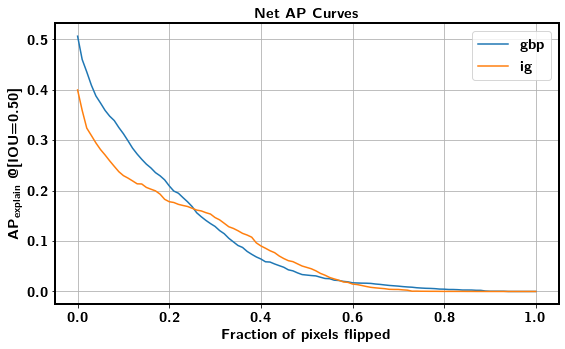

'AP$_{explain}$ is the average of mAP @[IOU=0.5] calculated for each\nimage in the dataset when a fraction of most relevant pixels are flipped\naccording to the explanation produced for a each detection'

In [31]:
ap_sheet_gbp = pd.read_excel('/media/deepan/externaldrive1/project_repos/DEXT_versions/dext/images/results/gbp_efficientdet.xlsx', sheet_name='ap_curve')
ap_sheet_ig = pd.read_excel('/media/deepan/externaldrive1/project_repos/DEXT_versions/dext/images/results/ig_efficientdet.xlsx', sheet_name='ap_curve')

ap_sheets = {
    r'\textbf{gbp}': ap_sheet_gbp,
    r'\textbf{ig}': ap_sheet_ig,
}   
compute_and_plot(ap_sheets, regex='ap_50percent_', curve_type='AP_Curves')
'''AP$_{explain}$ is the average of mAP @[IOU=0.5] calculated for each
image in the dataset when a fraction of most relevant pixels are flipped
according to the explanation produced for a each detection'''

In [23]:
def clean_sheets(df, column_value):
    df_new = df.loc[df['explaining'].isin(column_value)]
    df_new = df_new.replace([np.inf], 100)
    return df_new

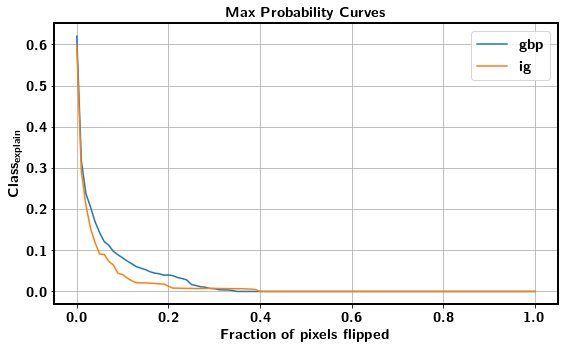

'Class$_{explain}$ is the average of the detection confidence across all detections in the dataset when a \nfraction of most relevant pixels flipped for each detection in the image according to the explanation produced'

In [24]:
max_prob_sheet_gbp = pd.read_excel('/media/deepan/externaldrive1/project_repos/DEXT_versions/dext/images/results/gbp_efficientdet.xlsx', sheet_name='max_prob_curve')
max_prob_sheet_gbp = clean_sheets(max_prob_sheet_gbp, ['ClassificationNone'])
max_prob_sheet_ig = pd.read_excel('/media/deepan/externaldrive1/project_repos/DEXT_versions/dext/images/results/ig_efficientdet.xlsx', sheet_name='max_prob_curve')
max_prob_sheet_ig = clean_sheets(max_prob_sheet_ig, ['ClassificationNone'])
max_prob_sheets = {
    r'\textbf{gbp}': max_prob_sheet_gbp,
    r'\textbf{ig}': max_prob_sheet_ig,
}   
compute_and_plot(max_prob_sheets, regex='max_prob_', curve_type='Max_Probability_Curves')
'''Class$_{explain}$ is the average of the detection confidence across all
detections in the dataset when a fraction of most relevant pixels are flipped 
for each detection in the image according to the explanation produced for the detection.
The confidence is tracked only for the detection explained at an instance.'''

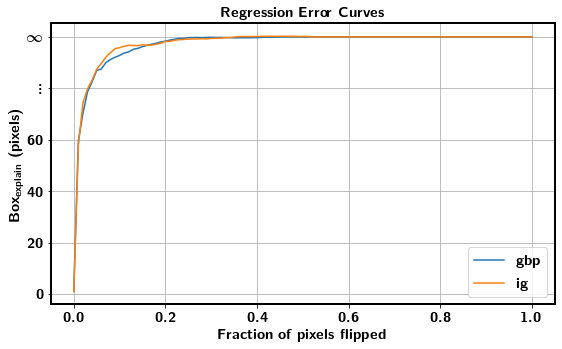

'Box$_{explain}$ is the average of the detection regression error across all\ndetections in the dataset when a fraction of most relevant pixels are flipped \nfor each detection in the image according to the explanation produced for the detection.\nThe regression error is calculated only for the detection under explanation with respect\nto the original image detections before flipping most relevant pixels.'

In [38]:
reg_error_sheet_gbp = pd.read_excel('/media/deepan/externaldrive1/project_repos/DEXT_versions/dext/images/results/gbp_efficientdet.xlsx', sheet_name='reg_error_curve')
reg_error_sheet_gbp = clean_sheets(reg_error_sheet_gbp, ['Box offset0', 'Box offset1', 'Box offset2', 'Box offset3'])
reg_error_sheet_ig = pd.read_excel('/media/deepan/externaldrive1/project_repos/DEXT_versions/dext/images/results/ig_efficientdet.xlsx', sheet_name='reg_error_curve')
reg_error_sheet_ig = clean_sheets(reg_error_sheet_ig, ['Box offset0', 'Box offset1', 'Box offset2', 'Box offset3'])
reg_error_sheets = {
    r'\textbf{gbp}': reg_error_sheet_gbp,
    r'\textbf{ig}': reg_error_sheet_ig,
}   
compute_and_plot(reg_error_sheets, regex='reg_error_', curve_type='Regression_Error_Curves')
'''Box$_{explain}$ is the average of the detection regression error across all
detections in the dataset when a fraction of most relevant pixels are flipped 
for each detection in the image according to the explanation produced for the detection.
The regression error is calculated only for the detection under explanation with respect
to the original image detections before flipping most relevant pixels.'''

In [39]:
# Plot average P_miss
# find AUC for each and give it on the label
# What is the value to flip pixels? See how the human retinal plane deals with the values it does not know. 
# Also check the flip value in the original LRP paper.  